In [2]:
import astro_coord as ac
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.time import Time 
from astropy import coordinates
from astropy import units as u
import re #regex, if needed
import time
from threading import Timer
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd
%matplotlib inline

In [3]:
def PST_to_uni(yr, mon, day, hr = 0, minute = 0,sec = 0):
    return int(time.mktime(time.strptime(
        str(yr) +'-'+str(mon)+'-'+str(day)+' '+str(hr)+':'+str(minute)+':'+str(sec), 
        '%Y-%m-%d %H:%M:%S')))

In [4]:
###Unix to PST
def uni_to_PST(uni, fmt = '%Y-%m-%d %H:%M:%S %Z%z'):
    '''
    Converts unix time to PST
    
    uni: integer, unix time
    fmt: str, format you would like to display your results (see datetime documentation
    for details)
    
    return: time in PST. Made function vectorized so it can take arrays.
    '''
    return datetime.fromtimestamp(float(uni)).astimezone(
        timezone('US/Pacific')).strftime(fmt)

In [5]:
def get_altaz(ra,dec,jd=None,lat = 37.9183, lon = -122.1067, alt = 304, equinox='J2000'):
    """
    Return the altitude and azimuth of an object whose right ascension 
    and declination are known.
    Parameters
    ----------
    ra : float, right ascension in degrees
    dec: float, declination in degrees
    jd : float, Julian Date, default=now
    lat: float, latitude in degrees
    lon: float, longitude in degrees
    alt: float, altitude in m, 
    equinox : string, equinox of ra/dec coordinates.  default='J2000'
    Returns
    -------
    alt : float, altitude in degrees
    az : float, azimuth in degrees

    """
    if jd: t = ap.time.Time(jd,format='jd')
    else: t = ap.time.Time(time.time(),format='unix')
    l = ap.coordinates.EarthLocation(lat=lat*u.deg,
                        lon=lon*u.deg,height=alt*u.m)
    f = ap.coordinates.AltAz(obstime=t,location=l)
    c = ap.coordinates.SkyCoord(ra, dec, frame='fk5',unit='deg',equinox=equinox)
    altaz = c.transform_to(f)
    return altaz.alt.deg, altaz.az.deg

In [7]:
start = PST_to_uni(2018,4,17,hr=12,minute = 0, sec=0)
end = PST_to_uni(2018,4,19,hr=0, minute= 0, sec = 0)
UNIX = []
while start < end :
    start = start + 1800
    UNIX.append(start)
UNIX = np.asarray(UNIX)
Julian = Time(UNIX, format='unix').jd

In [8]:
from time import strftime
from datetime import datetime
TIME = []
for i in range(int(len(UNIX))):
    x = datetime.fromtimestamp(int(str(int(UNIX[i])))).strftime('%Y-%m-%d %H:%M:%S')
    TIME.append(x)


### Converting Galactic Coordinate Boudaries to Altitude and Azimuth boundaries 

In [ ]:
S1_long = np.linspace(210,380,int((381-210)/2))
S1_lat = np.zeros(len(S1_long))
S2_lat = np.linspace(0,90,int(91./2))
S2_long = []
for l in range(int(len(S2_lat))):
    l = 210
    S2_long.append(l)
S2_long = np.asarray(S2_long)
S3_lat = np.linspace(0,90,int(91./2))
S3_long = []
for l in range(int(len(S3_lat))):
    l = 380
    S3_long.append(l)
S3_long = np.asarray(S3_long)
S_long = np.concatenate([S1_long,S2_long,S3_long])
S_lat = np.concatenate([S1_lat,S2_lat,S3_lat])

In [ ]:
RA = []
DEC = []
for i in range(int(len(S_long))):
    ra, dec = ac.convert_galactic2000_to_ra_dec(S_long[i],S_lat[i])
    RA.append(ra)
    DEC.append(dec)
RA = np.asarray(RA)
DEC = np.asarray(DEC)

In [ ]:
Alt = []
Az = []
for i,j,l in zip(RA,DEC,range(int(len(RA)))):
    if l%10 == 0:
        print(l)
    for k in range(int(len(Julian))):
        alt, az = get_altaz(i,j,jd=Julian[k])
        Alt.append(alt)
        Az.append(az)
        


In [ ]:
Alt=np.asarray(Alt)
Az = np.asarray(Az)

In [ ]:
Alt = Alt.reshape(len(RA),len(Julian))
Az = Az.reshape(len(DEC),len(Julian))
plt.figure(figsize=(20,10))
plt.plot(Az,Alt,'o', markersize =0.5)
# plt.xlim(5,355)
# plt.ylim(15,85)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Altitude for North Polar Spur', fontsize=20)
for i in range(int(len(Alt))):
    plt.plot((UNIX-UNIX[0])/3600,Alt[i],'o')
plt.ylim(15,85)
plt.xlabel('PST time starting on April 10 at midnight ',fontsize = 20)
plt.ylabel('Altitude [$\degree$]',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(int(len(Az))):
    plt.plot((UNIX-UNIX[0])/3600,Az[i],'o')
plt.show()

In [ ]:
BL = []
BA = []
for k in range(int(len(Julian))):
    for i in range(int(len(Alt))):
        BL.append(Alt[i][k])
    for i in range(int(len(Az))):
        BA.append(Az[i][k])
BL = np.asarray(BL)
BA = np.asarray(BA)



In [ ]:
BL = BL.reshape(len(Julian),len(Alt))
BA = BA.reshape(len(Julian),len(Az))

In [23]:
S1_Az = np.linspace(5,355,int((356-5)/2))
S1_alt = []
for l in range(int(len(S1_Az))):
    l = 15
    S1_alt.append(l)
S2_Az = np.linspace(5,355,int((356-5)/2))
S2_alt = []
for l in range(int(len(S2_Az))):
    l = 85
    S2_alt.append(l)
S3_alt = np.linspace(15,85,int((86-5)/2))
S3_az = []
for l in range(int(len(S3_alt))):
    l = 5
    S3_az.append(l)
S4_alt = np.linspace(15,85,int((86-5)/2))
S4_az = []
for li in range(int(len(S4_alt))):
    l = 355
    S4_az.append(l)
S1_alt=np.asarray(S1_alt)
S2_alt=np.asarray(S2_alt)
S3_az = np.asarray(S3_az)
S4_az = np.asarray(S4_az)
S_alt = np.concatenate([S1_alt,S2_alt,S3_alt,S4_alt])
S_az = np.concatenate([S1_Az,S2_Az,S3_az,S4_az])

In [9]:
def plot_mwd(bound_alt,bound_az,t,Az,Alt,org=0, projection='mollweide'):
    ''' Az, Alt are arrays of the same length.
    Az takes values in [0,360), Alt in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(Az+360,360) # shift az values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    ax.scatter(np.radians(x),np.radians(Alt))  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title('North Polar Spur at ' + str(t))
    ax.title.set_fontsize(15)
    ax.set_xlabel("Azimuth [$\degree$]",fontsize = 20)
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Altitude [$\degree$]",fontsize=20)
    ax.yaxis.label.set_fontsize(12)
    Az_bound = np.remainder(bound_az+360,360)
    indt = Az_bound>180
    Az_bound[indt] -=360
    Az_bound= -Az_bound
    Alt_bound= bound_alt
    ax.scatter(np.radians(Az_bound),np.radians(Alt_bound))
    ax.grid(True)

### Finding the optimal path 

In [10]:
NPS_lat = []
ll = 0 
while ll < 92:
    NPS_lat.append(ll)
    ll = ll + 2
NPS_long = []
bb = 210 
while bb < 382:
    NPS_long.append(bb)
    bb = bb + 2

In [11]:
NPS_lat = np.asarray(NPS_lat)
NPS_long = np.asarray(NPS_long)

In [12]:
delta_l = 2/np.cos(np.radians(NPS_lat))

In [13]:
print(len(NPS_lat),len(NPS_long))

(46, 86)


In [14]:
NPS_l = []
NPS_b = []
for i in range(int(len(NPS_lat[:-1]))):
    l = NPS_long[0]
    while l < NPS_long[-1] +1 : 
        NPS_l.append(l)
        l = l + delta_l[i]
        NPS_b.append(NPS_lat[i])
        


In [15]:
NPS_l = np.asarray(NPS_l)
NPS_b = np.asarray(NPS_b)

In [16]:
NPS_ra = []
NPS_dec = []
for i in range(int(len(NPS_l))):
    ra, dec = ac.convert_galactic2000_to_ra_dec(NPS_l[i],NPS_b[i])
    NPS_ra.append(ra)
    NPS_dec.append(dec)
NPS_ra = np.asarray(NPS_ra)
NPS_dec = np.asarray(NPS_dec)

In [ ]:
np.savez('NPS_coord_ra_dec',NPS_ra,NPS_dec)

In [17]:
NPS_alt = []
NPS_az = []
for i,j,l in zip(NPS_ra,NPS_dec,range(int(len(NPS_ra)))):
    if l%100 == 0:
        print(l)
    for k in range(int(len(Julian))):
        alt, az = get_altaz(i,j,jd=Julian[k])
        NPS_alt.append(alt)
        NPS_az.append(az)
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [18]:
NPS_alt=np.asarray(NPS_alt)
NPS_az = np.asarray(NPS_az)

In [19]:
NPS_alt = NPS_alt.reshape(len(NPS_ra),len(Julian))
NPS_az = NPS_az.reshape(len(NPS_dec),len(Julian))

In [20]:
BL = []
BA = []
for k in range(int(len(Julian))):
    for i in range(int(len(NPS_alt))):
        BL.append(NPS_alt[i][k])
    for i in range(int(len(NPS_az))):
        BA.append(NPS_az[i][k])
BL = np.asarray(BL)
BA = np.asarray(BA)

In [21]:
BL = BL.reshape(len(Julian),len(NPS_alt))
BA = BA.reshape(len(Julian),len(NPS_az))

c:\python27\lib\site-packages\matplotlib\projections\geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


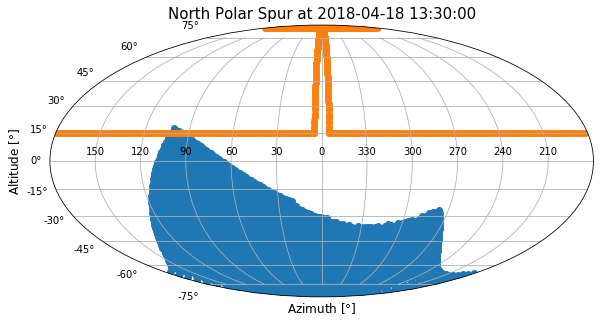

In [24]:
plot_mwd(S_alt,S_az,TIME[50],BA[50],BL[50])

c:\python27\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


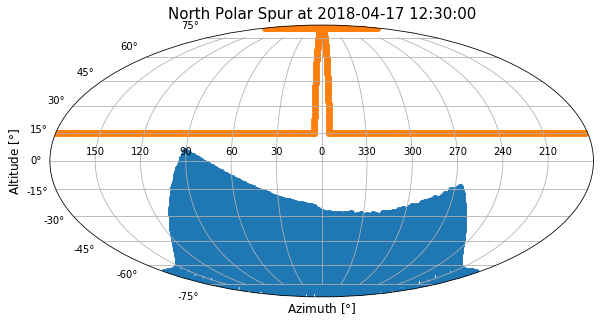

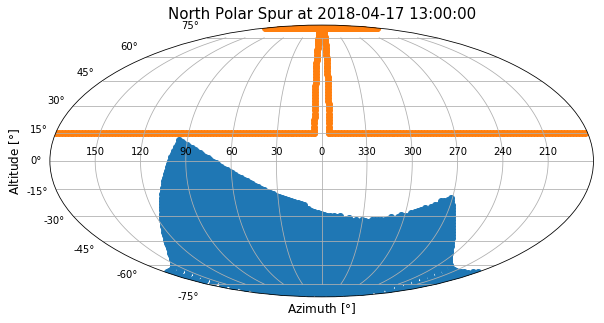

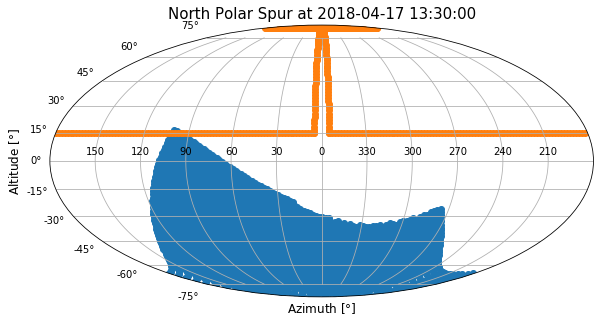

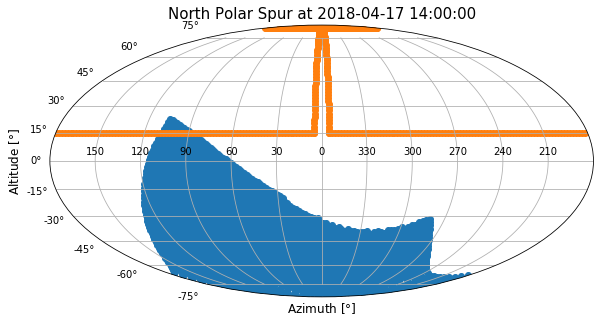

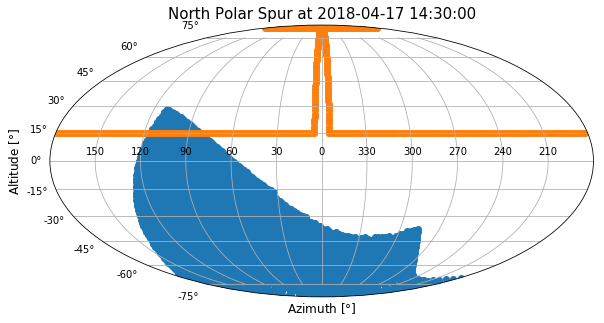

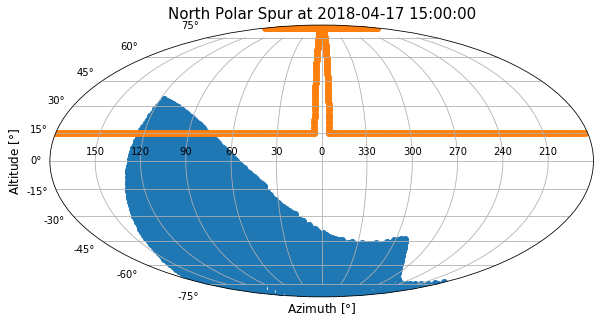

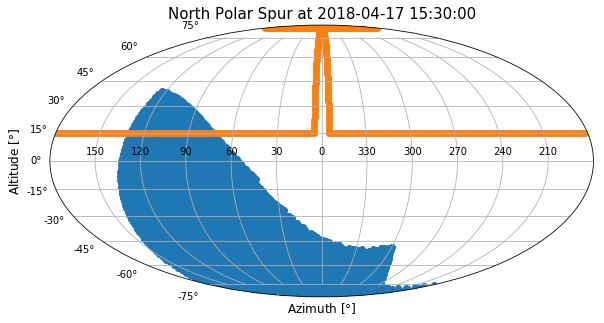

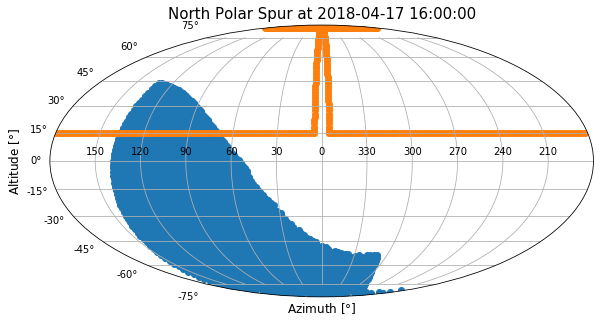

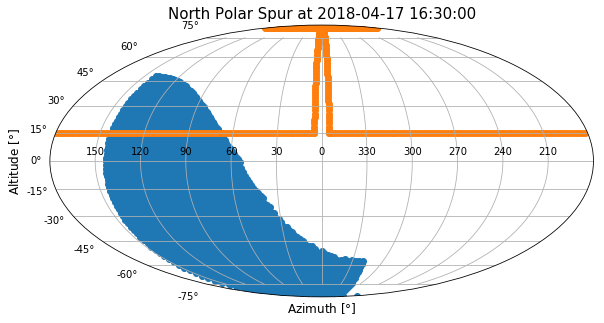

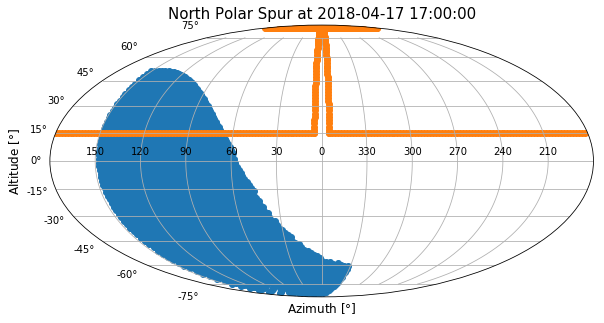

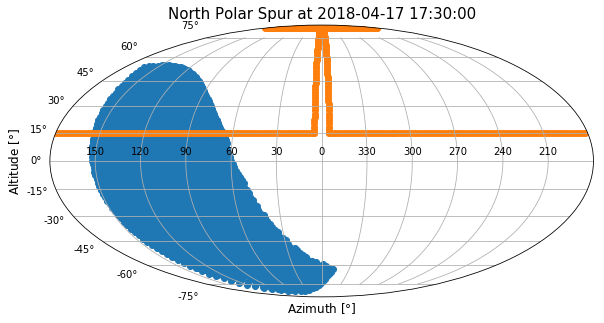

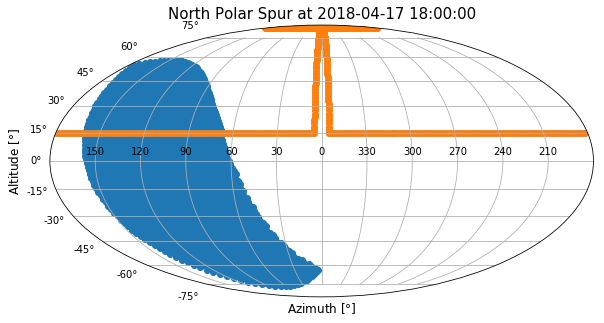

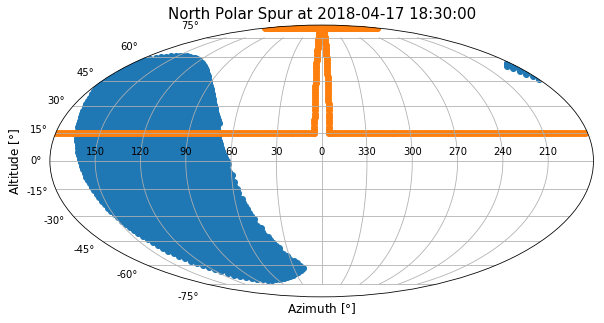

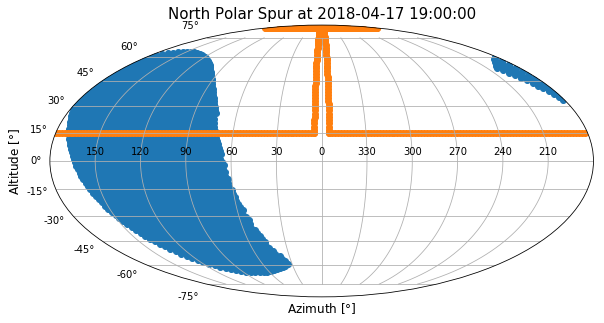

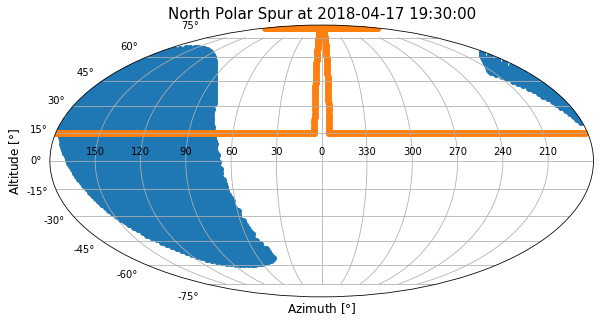

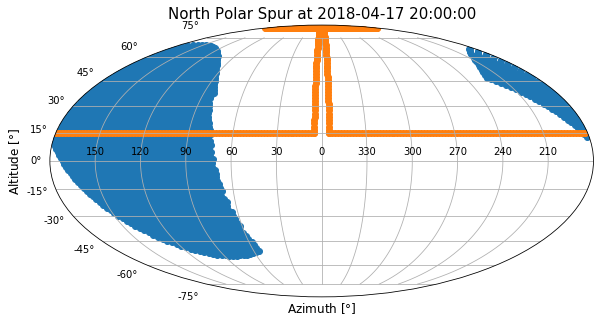

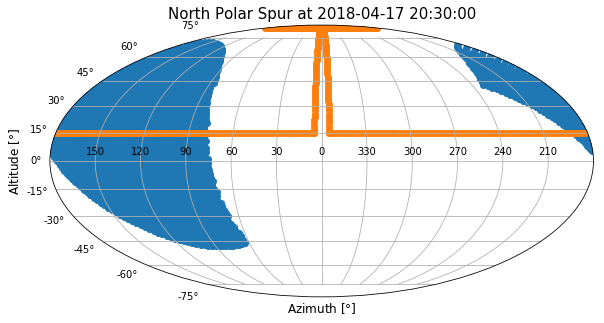

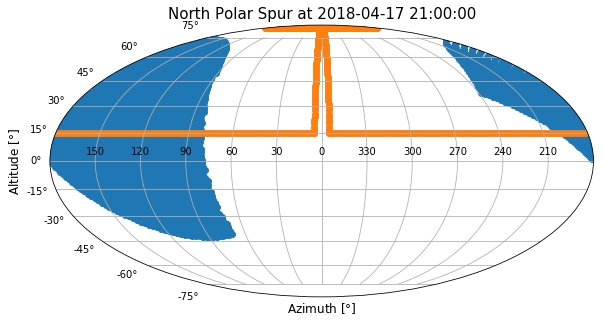

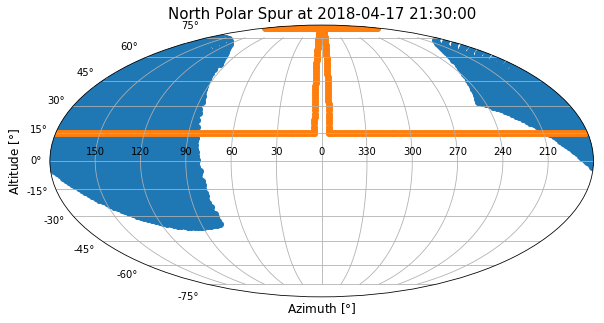

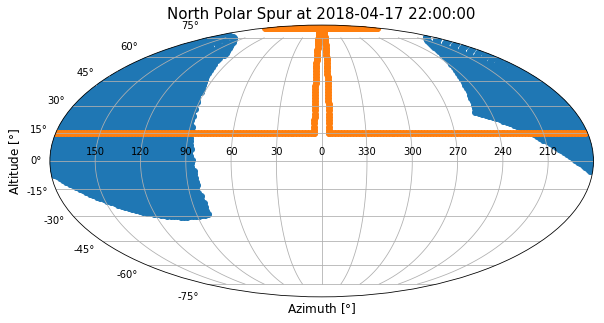

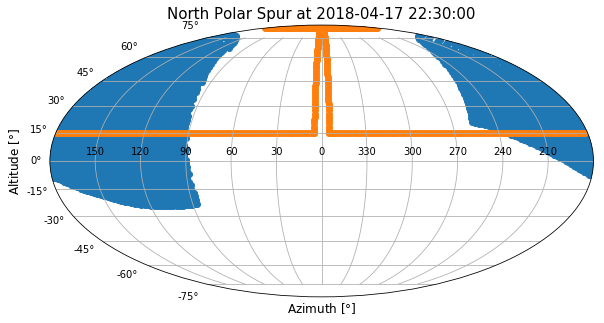

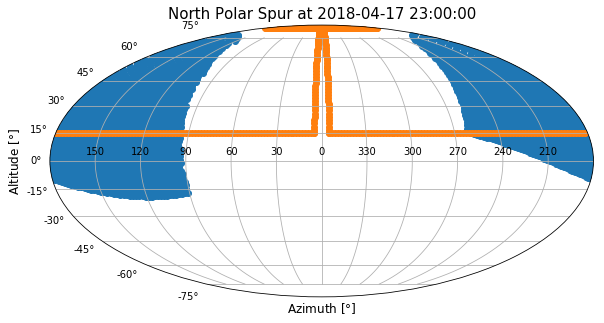

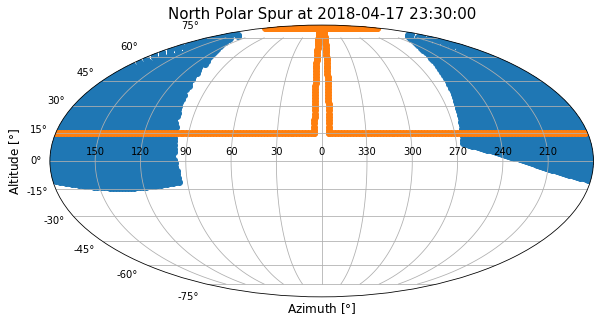

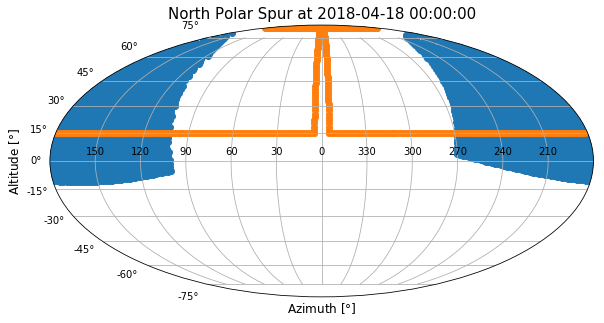

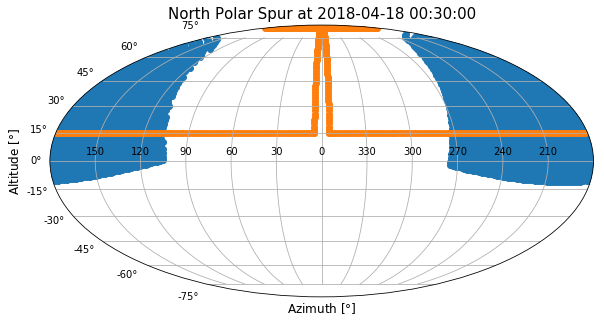

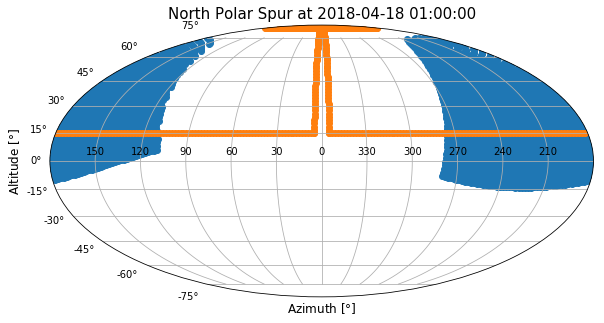

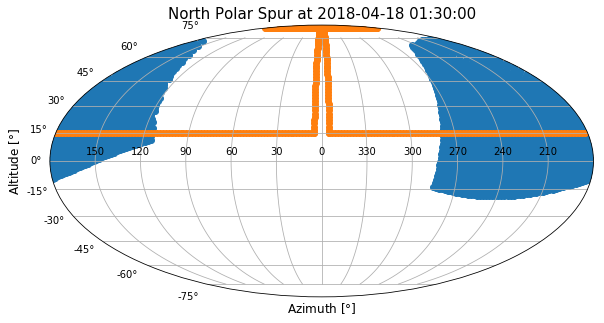

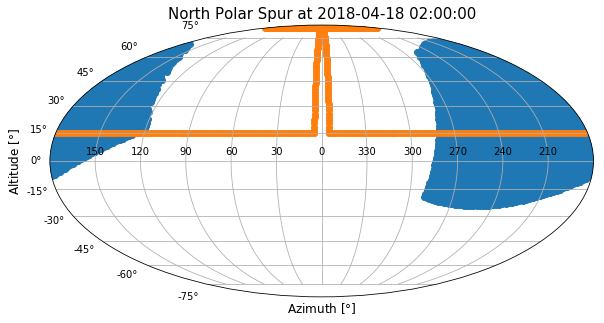

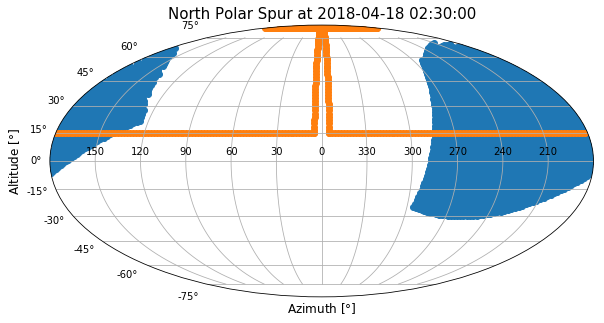

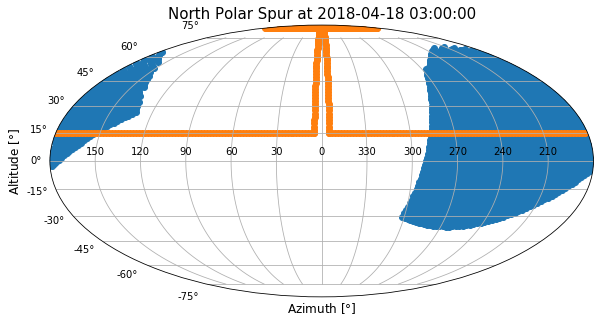

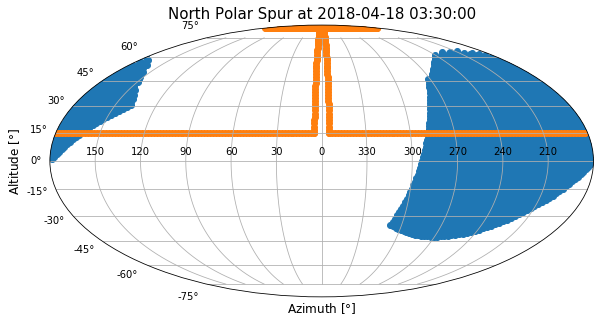

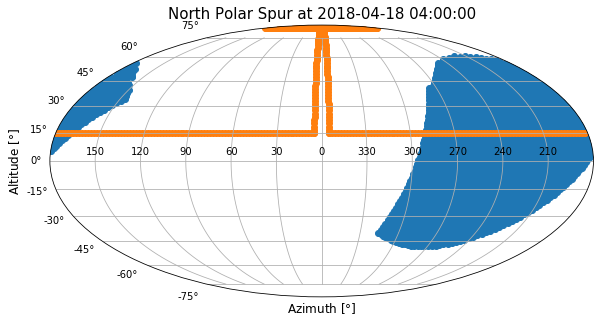

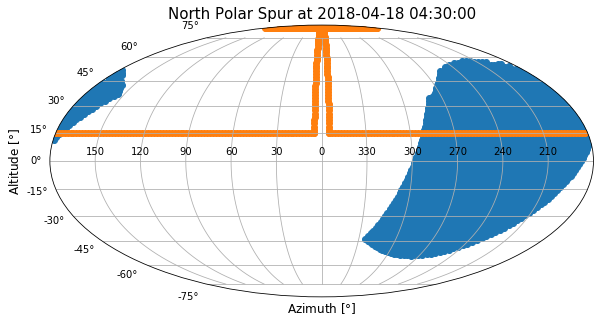

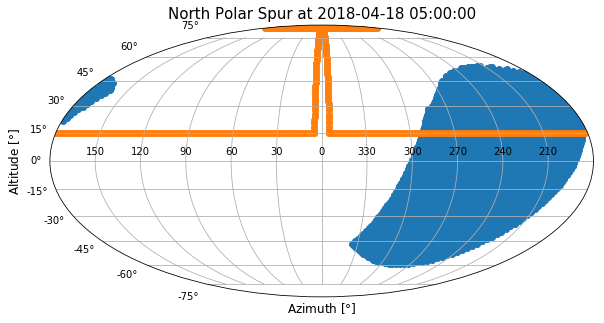

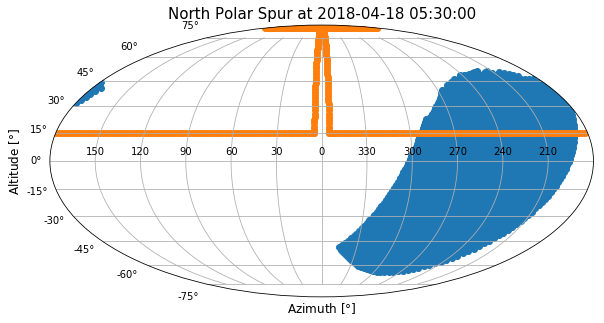

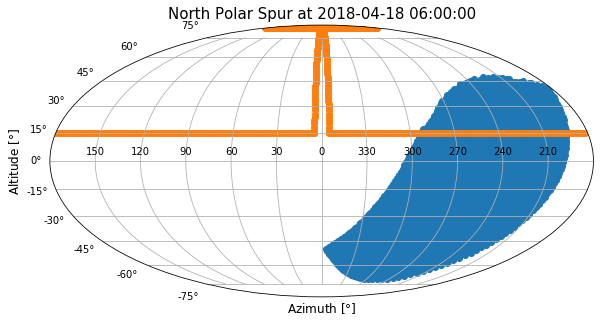

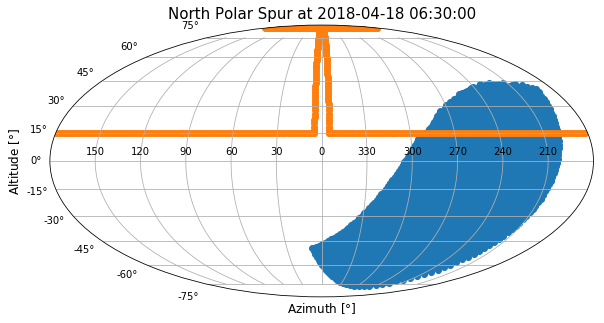

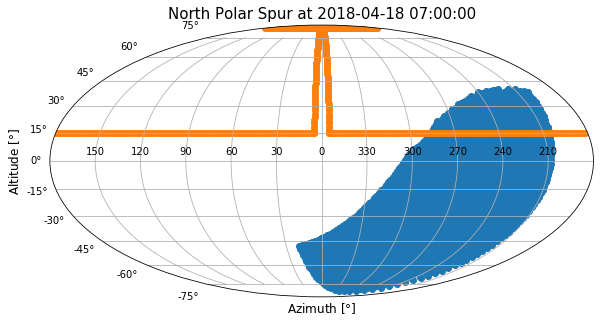

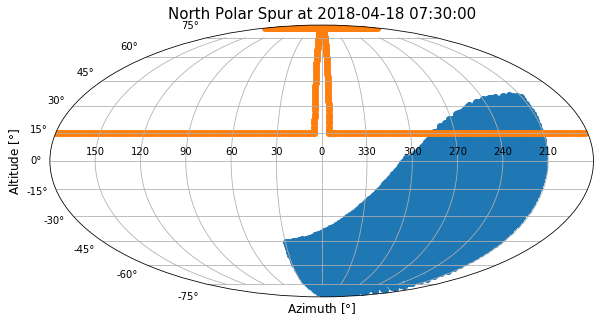

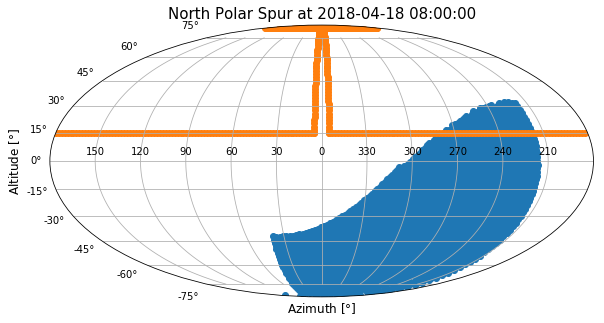

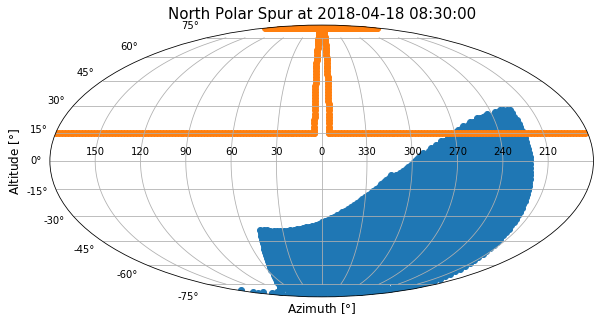

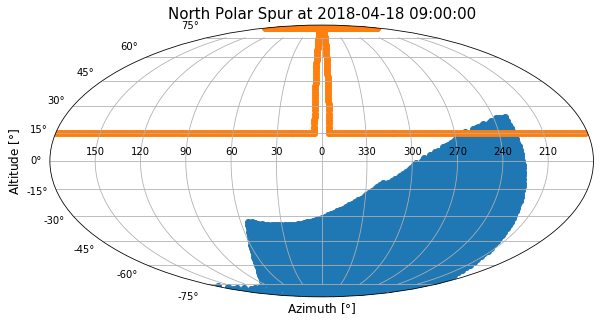

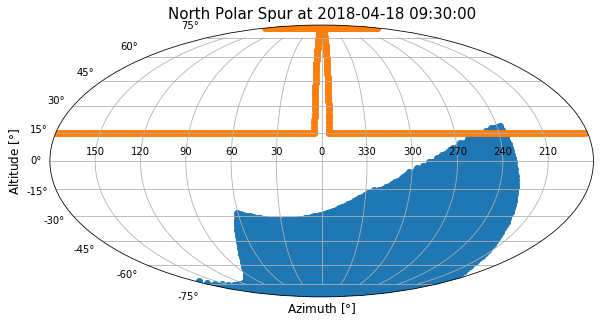

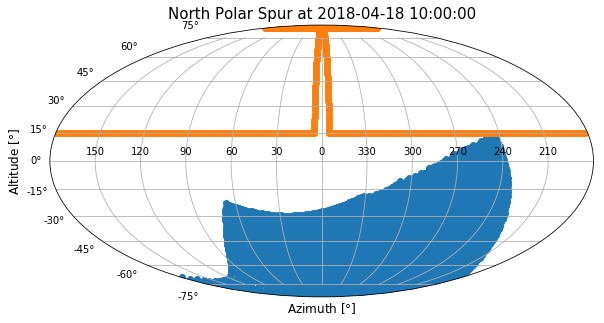

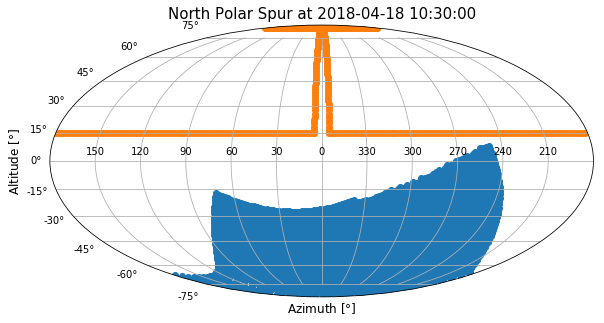

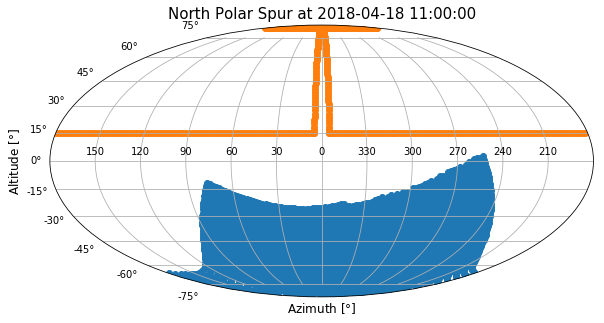

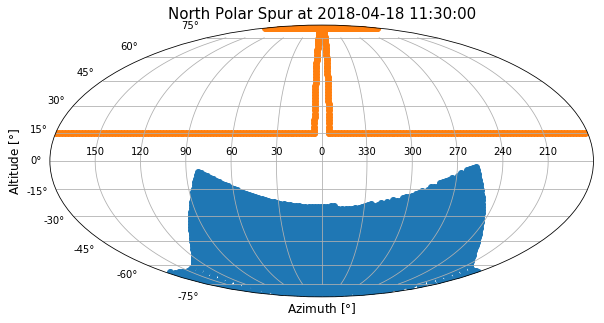

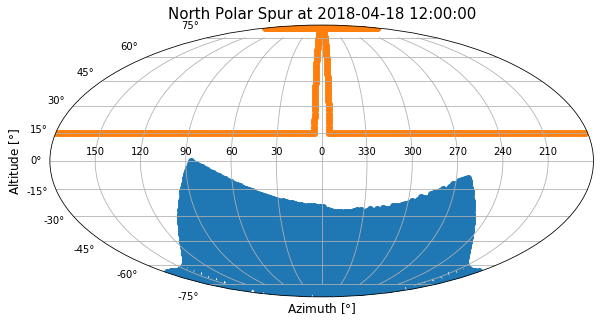

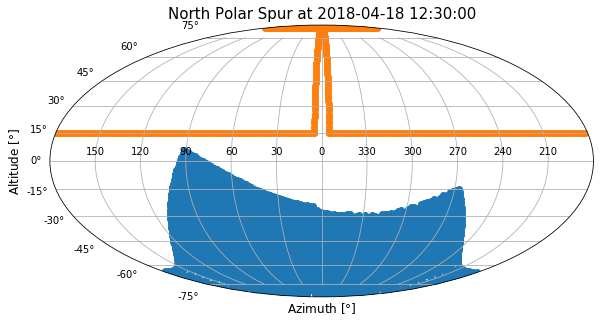

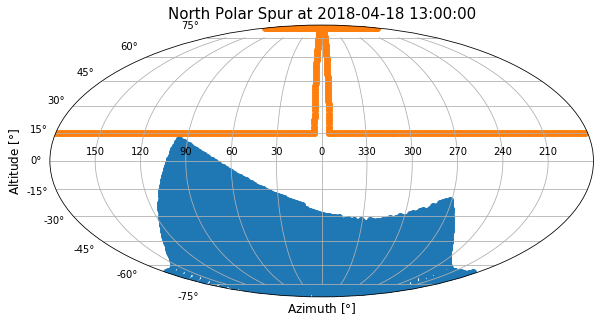

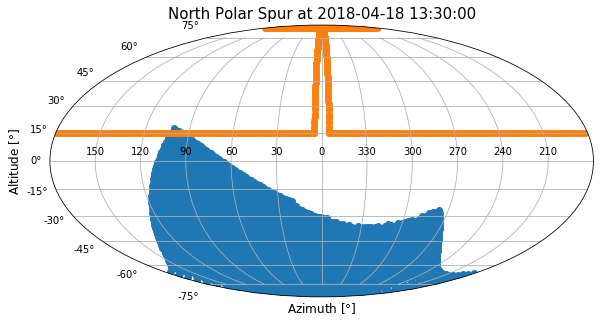

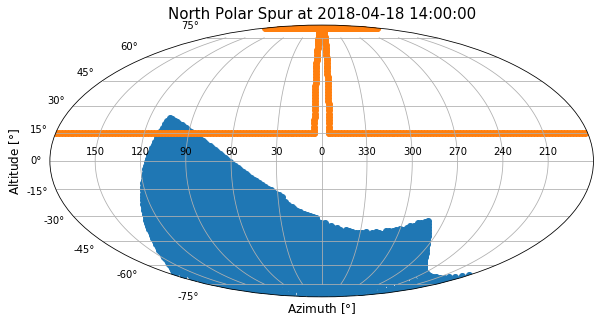

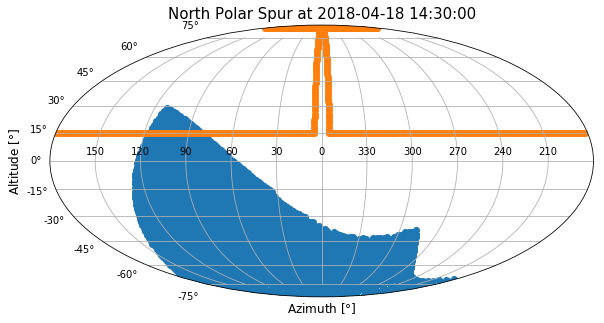

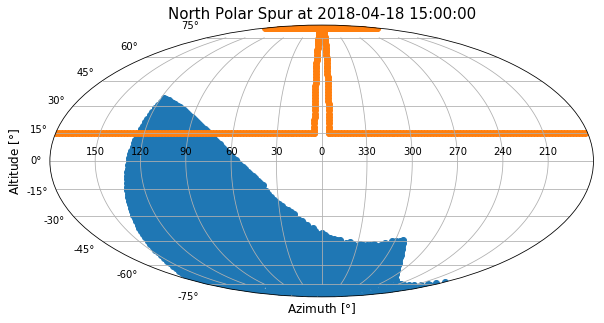

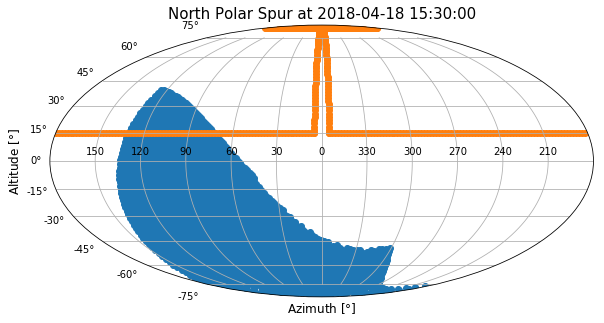

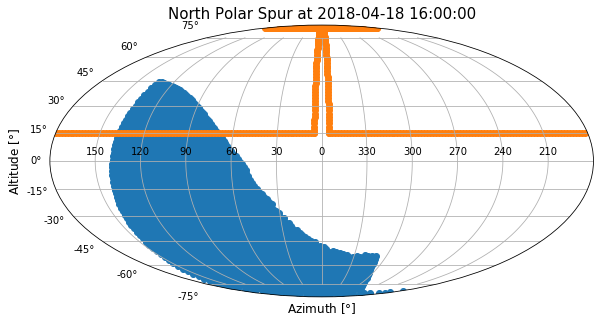

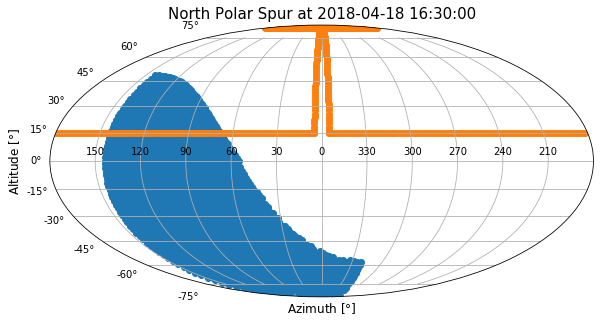

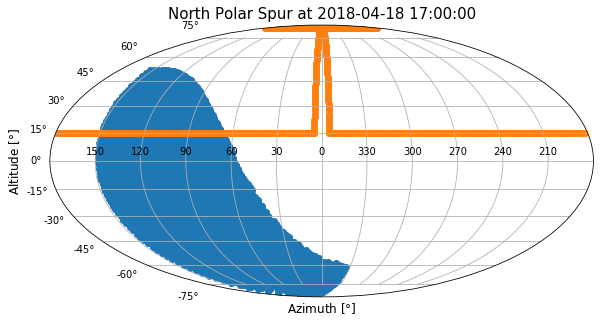

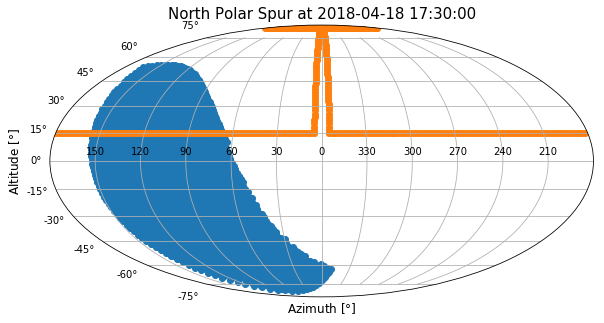

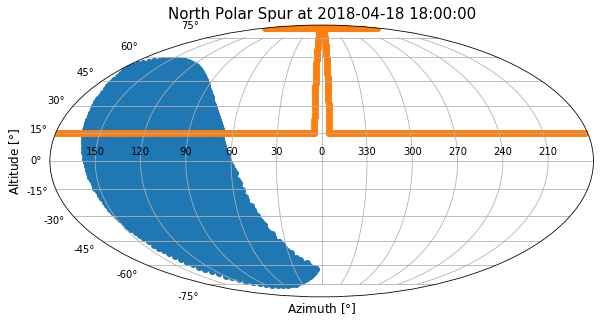

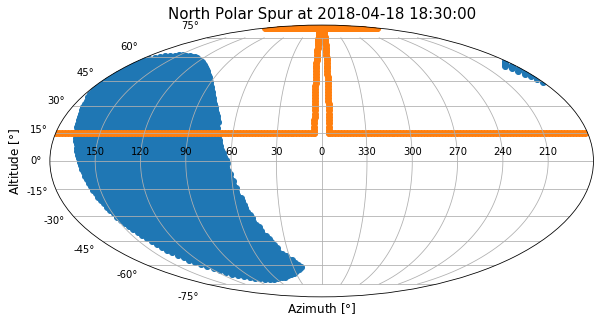

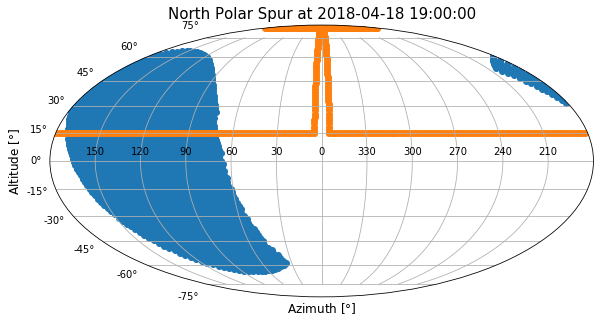

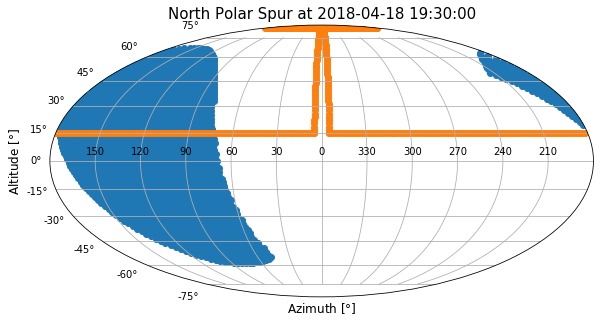

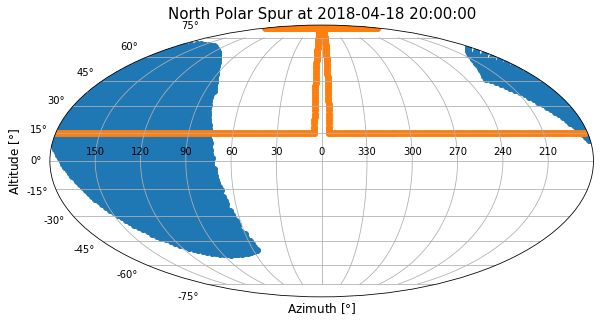

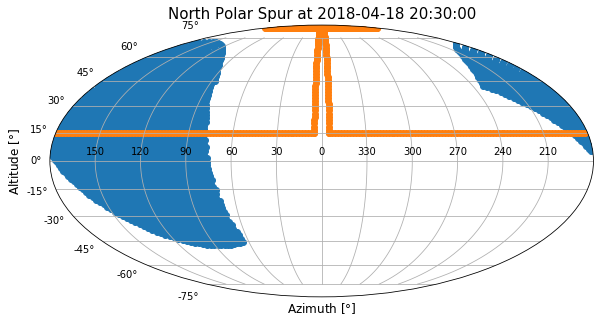

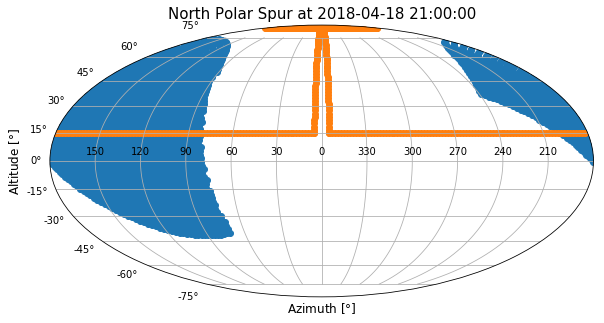

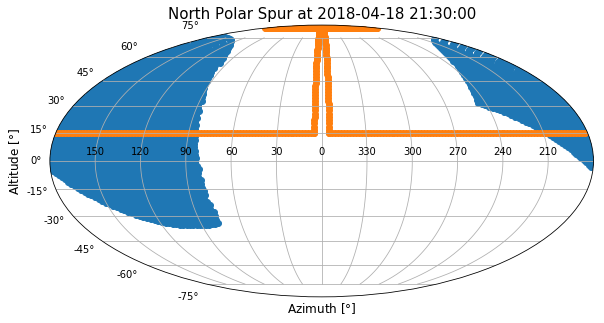

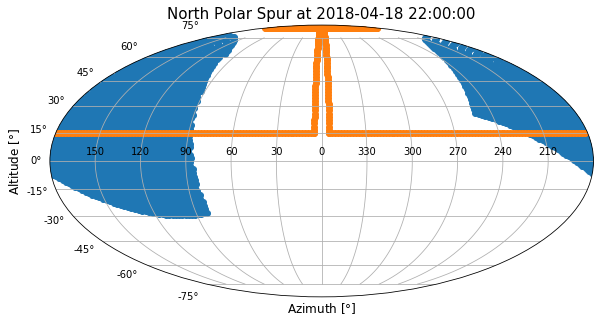

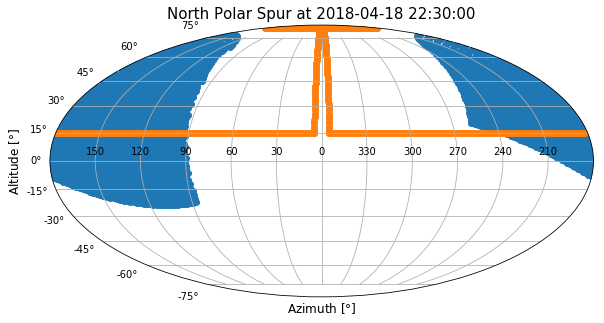

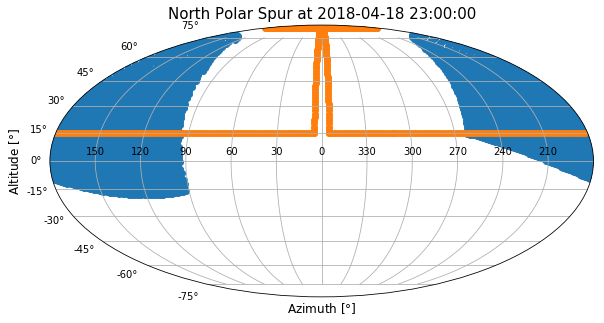

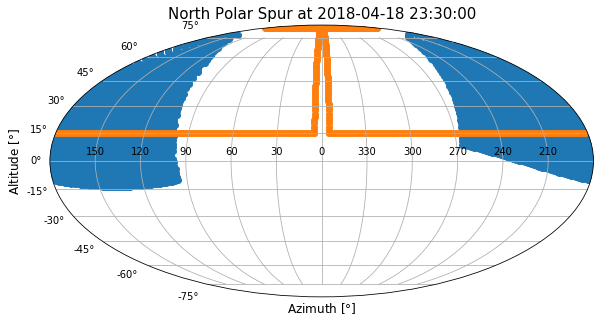

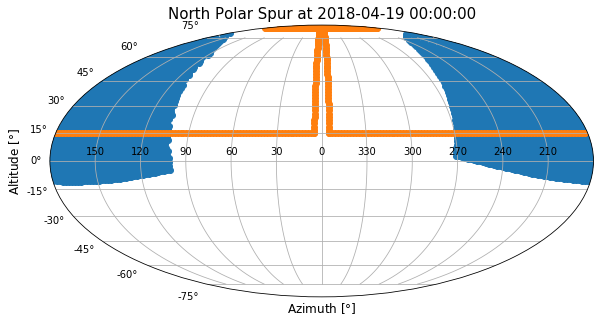

In [25]:
for i in range(int(len(TIME))):
    plot_mwd(S_alt,S_az,TIME[i],BA[i],BL[i])
    plt.savefig('Bound_'+str(i)+'.png')

In [ ]:
yee = []
for i in range(int(len(NPS_alt))):
    for k in range(int(len(Julian))):
        alt = NPS_alt[i][k]
        az = NPS_az[i][k]
        
        if 15 < alt < 85 and 5 < az < 355:
            yee.append([i,k])
        
    